## TODO 1: EDA
* Sử dụng bộ data [Kaggle - Ecommerce Customers](https://www.kaggle.com/srolka/ecommerce-customers)

## EDA
* Univariate Analysis: 
    - Trình bày các quan sát về phân phối của các biến
    - Bộ Data có các điểm nào cần chú ý (để thực hiện trong bước Data Processing)?
* Multivariate Analysis: 
    - Trình bày các tương tác thú vị giữa các biến, giải thích thêm theo ý kiến và suy nghĩ của bạn
## Customer Yearly Amount Spent
Yếu tố chúng ta quan tâm nhất là `Yearly Amount Spent` (Số tiền giao dịch của khách hàng trong năm)

Tự đặt các giả thuyết về yếu tố ảnh hướng (trong bộ data) và làm các bước phân tích, vẽ các biểu đồ để tìm hiểu các giả thuyết đó.

In [148]:
# Import thư viện
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [149]:
# Đọc data
data_file_path = "Ecommerce Customers.csv"
customer_df = pd.read_csv(data_file_path)
customer_df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [161]:
# Summary
print('Summary:')
print(customer_df.shape)
customer_df.dtypes

Summary:
(500, 8)


Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [6]:
# Summary
print('Summary:')
customer_df.describe(percentiles= [.25, .5, .75, .95], include='all')

Summary:


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,katherine20@yahoo.com,USCGC Gill\nFPO AA 26496,CadetBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [71]:
# Tỉ lệ Missing
def missing_exploration(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_exploration(customer_df)

,Total,Percent
Yearly Amount Spent,0,0.0
Length of Membership,0,0.0
Time on Website,0,0.0
Time on App,0,0.0
Avg. Session Length,0,0.0
Avatar,0,0.0
Address,0,0.0
Email,0,0.0


In [98]:
# Filter columns by dtype numerical or categorical
categorical = [col for col in customer_df.columns.tolist() if customer_df[col].dtype == 'object' ]
numerical = [col for col in customer_df.columns.tolist() if col not in categorical]

['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
['Email', 'Address', 'Avatar']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


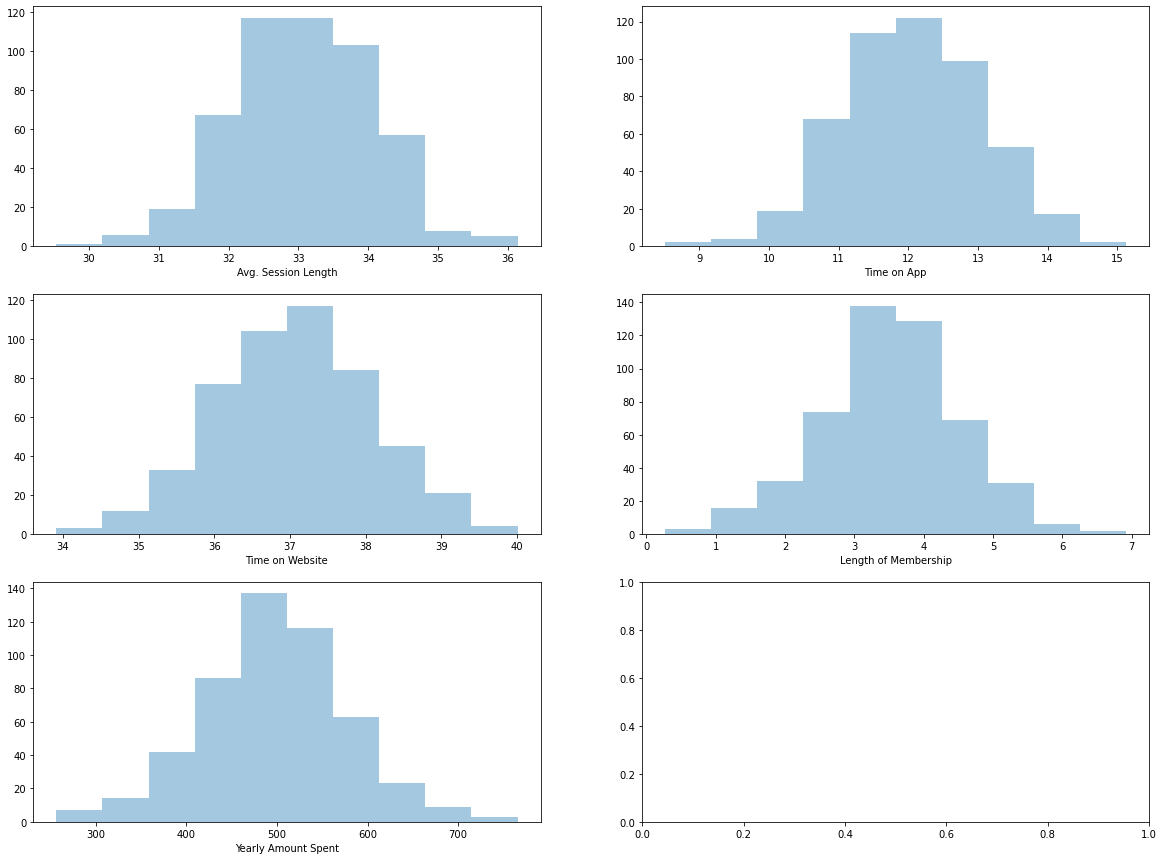

In [164]:
# Histograms
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, subplot in zip(numerical, ax.flatten()):
    sns.distplot(a = customer_df[i], label = i, kde = False, ax = subplot, bins = 10)

In [ ]:
# i = 4
# print(numerical[i])
# customer_df[numerical[i]].describe()

### TODO #1: EDA - Univariate Analysis

### Summary:

1. Bộ dữ liệu ghi lại các thông tin về khách hàng, các quan sát thời gian khách hàng sử dụng khi xem sản phẩm trên Web và trên App và Trung bình giá trị tiêu dùng hằng của khách hàng
2. Bộ data có 500 dòng dữ liệu và 8 cột dữ liệu, trong đó có 3 cột category và 5 cột numeric
3. Tất các các cột đều không có giá trị missing

### Univariable

1. Cột 'Avg. Session Length': Thời lượng trung bình 1 session của khách hàng
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (29.5, 36.139)
* Giá trị mean và giá trị q50 khá gần nhau (33.053194, 33.082008)
* độ lệch chuẩn std rất nhỏ (chỉ bằng 1/33 giá trị trung bình)
* giá trị tập trung trong khoảng 32.2 đến 33.4
> Phân phổi của Avg. Session Length khá chuẩn, không có outlier, không có giá trị missing

2. Cột 'Time on App': Thời lượng trung bình 1 session của khách hàng xem bằng App
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (8.508152, 15.126994)
* Giá trị mean và giá trị q50 khá gần nhau (12.052488, 11.983231)
* độ lệch chuẩn std nhỏ (chỉ bằng 1/12 giá trị trung bình)
* giá trị tập trung trong khoảng 11.2 đến 12.5
> Phân phổi khá chuẩn, không có outlier, không có giá trị missing

3. Cột 'Time on Website': Thời lượng trung bình 1 session của khách hàng xem bằng Web
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (33.913847, 40.005182)
* Giá trị mean và giá trị q50 gần trùng nhau (37.060445, 37.069367)
* độ lệch chuẩn std nhỏ (chỉ bằng 1/37 giá trị trung bình)
* giá trị tập trung trong khoảng 36.3 đến 37.5
> Phân phổi hình chuông, không có outlier, không có giá trị missing

4. Cột 'Length of Membership': Tuổi thọ thành viên
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (0.269901, 6.922689)
* Giá trị mean và giá trị q50 gần trùng nhau (3.533462, 3.533975)
* độ lệch chuẩn std lớn 0.999278 (gần 1/4 giá trị trung bình)
* giá trị tập trung trong khoảng 3.0 đến 4.2
> Phân phổi hình chuông nhọn, không có outlier, không có giá trị missing

5. Cột 'Yearly Amount Spent': Trung bình chi tiêu hằng năm
* Kiểu dữ liệu: float
* Giá trị nằm trong khoảng: (0.269901, 6.922689)
* Giá trị mean và giá trị q50 gần trùng nhau (499.314038, 498.887875)
* độ lệch chuẩn std lớn 79.314782(gần 1/6 giá trị trung bình)
* giá trị tập trung trong khoảng 450 đến 550
> Phân phổi hình chuông, không có outlier, không có giá trị missing

> Bộ Data đáng tin cậy

In [ ]:
## Multivariate Analysis:
# Trình bày các tương tác thú vị giữa các biến, giải thích thêm theo ý kiến và suy nghĩ của bạn
# Customer Yearly Amount Spent
# Yếu tố chúng ta quan tâm nhất là Yearly Amount Spent (Số tiền giao dịch của khách hàng trong năm)
# Tự đặt các giả thuyết về yếu tố ảnh hướng (trong bộ data) và làm các bước phân tích, vẽ các biểu đồ để tìm hiểu các giả thuyết đó

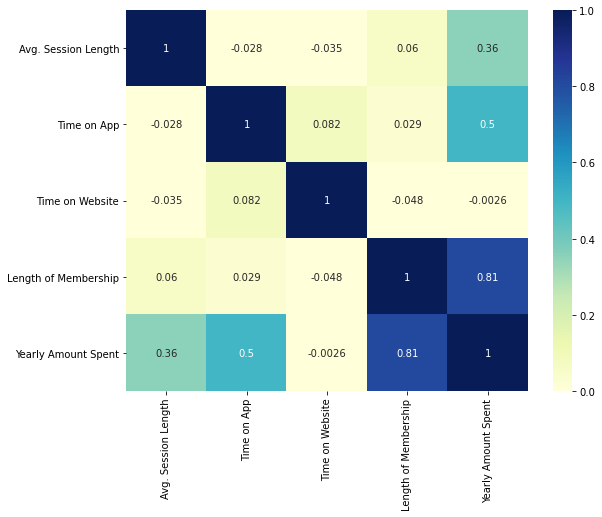

In [171]:
# Correlation matrix
# Set the width and height of the figure

corrmat = customer_df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corrmat,cmap = "YlGnBu",  annot=True ,vmin= 0, vmax=1)
plt.show()

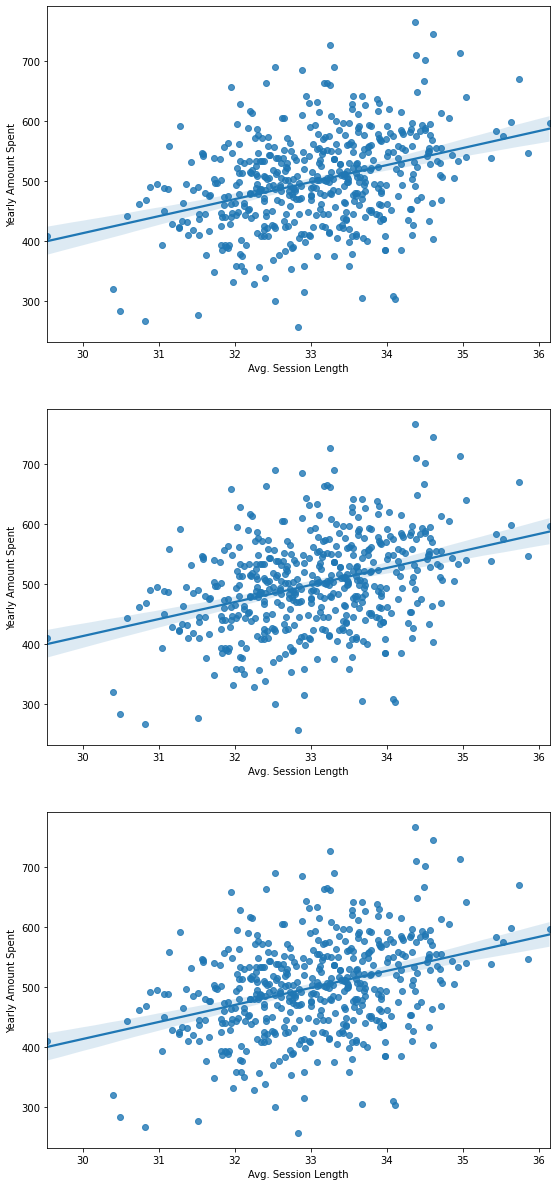

In [179]:
# Scatter plot 'Year Amount Spent' vs 'Length of Membership'
# Scatter plot 'Year Amount Spent' vs 'Time on App'
# Scatter plot 'Year Amount Spent' vs 'Avg. Session Length'

scatter_lst = ['Length of Membership','Time on App','Avg. Session Length']
fig, ax = plt.subplots(3, 1, figsize=(9, 21))

for i, subplot in zip(scatter_lst, ax.flatten()):
    sns.regplot(x = customer_df['Avg. Session Length'], y = customer_df['Yearly Amount Spent'], ax = subplot)

plt.show()

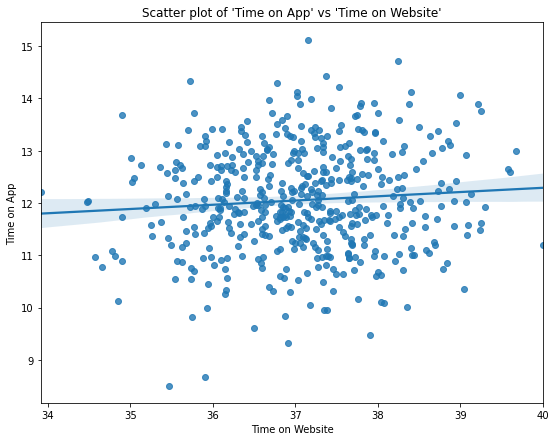

In [182]:
plt.figure(figsize = (9,7))
plt.title("Scatter plot of 'Time on App' vs 'Time on Website'")
sns.regplot(x = customer_df['Time on Website'], y = customer_df['Time on App'])
plt.show()

### TODO #1: EDA - Multivariate Analysis
### Summary:

1. Trung bình chi tiêu hằng năm của khách hàng 'Yearly Amount Spend' tỉ lệ thuận mạnh mẽ với tuổi thọ thành viên 'Length of Membership' (0.81), độ dài trung bình của session khi khách hàng lướt bắng APP 'Time on APP' (0.5) và sau đó là độ dài trung bình của mỗi lượt lướt 'Avg. Session Lenght' (0.36)

2. Các thuộc tính khác không có tương quan rõ ràng với nhau

### Multivariate

1. 'Yearly Amount Spent' tỉ lệ thuận mạnh mẽ với 'Lenght of Membership'
* điều này khá dễ hiểu bởi vì khách hàng càng trung thành thì càng có xu hướng chỉ mua sản phẩm của nhà sản xuất đó.

2. 'Yearly Amount Spent' tỉ lệ thuận với 'Time on App':
* điều này khá thú vị, nó thể hiện lên thói quen chốt deal của khách hàng. Có vẻ như khách hàng có xu hướng đặt mua trên App nhiều hơn. Có lẽ là việc kết hợp các tiện ích khác như (thanh toán, gọi điện) trên App (do thường được cài đặt trên các smartphone) tạo cho khách hàng thuận lợi hơn trong việc chốt deal, hoặc có lẽ do smartphone được mang theo bên mình nhiều hơn nên tỉ lệ chốt deal cũng được xảy ra nhiều hơn.

3. 'Yearly Amount Spent' tỉ lệ thuận với 'Avg. Session Lenght':
* điều này cũng dễ hiểu vì khi cang lướt qua sản phẩm nhiều thì khách hàng có xu hướng chi tiêu cho sản phẩm nhiều hơn.

4. 'Yearly Amount Spent' tỉ lệ không rõ ràng với 'Time on Web':
* Có lẽ đa số các khách hàng chỉ lên Web để xem thông tin về sản phẩm và dịch vụ là chủ yếu thứ ko để chốt deal



## TODO 2: LINEAR REGRESSIONS
Xem lại Lab về Linear Regressions. Tìm hiểu thêm các notebook khác trên Kaggle. 

Thực hiện bài toán Linear Regression với biến target (y) là `Yearly Amount Spent`. 
Lưu ý trình bày đầy đủ các bước:
* Data Processing
* Split Train & Test Data
* Modeling
* Evaluation

## TODO 3: CUSTOMER CLUSTERING
Tham khảo notebook sau: [Clustering with K-Means](https://www.kaggle.com/ryanholbrook/clustering-with-k-means#k-Means-Clustering)

* Áp dụng phương pháp Clustering lên bộ data để chia customers thành n nhóm (n tuỳ theo bạn lựa chọn)
* Trên n nhóm đã phân ra bằng clustering, trình bày chỉ số thông kê và phân phối của các biến sau: `Time on App`, `Avg. Session Length`, `Time on Website`, `Length of Membership`
* Visualize plot các yếu tố trên theo cặp. Ví dụ như bên dưới (cluster = các nhóm khác hàng đã chia)
![clustering](../img/clustering.png)
* Trình bày các quyết định, chiến lược kinh doanh có thể thực hiện dựa trên kết quả của clustering để giúp tăng doanh thu.

## TODO 4 (OPTIONAL) DECISION TREE
* Tạo biến `HighVal_Cust` (High-value Customers) là những khách hàng có `Yearly Amount Spent` > 80% percentiles của mẫu data. 
* Tham khảo notebook sau: [Decision-Tree Classifier Tutorial](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)
* Dùng Decision Tree để phân loại `HighVal_Cust`
* Visualize Decision Tree giúp phân loại các khách hàng có giá trị cao.
![decisiontree](../img/decisiontree.png)